# sentimentor model

First I imported all the necessary libraries
- fastai for the text analysis
- torch for some basic checking (like GPU)
- pandas for loading and preprocessing the dataset

In [5]:
from fastai.text.all import *
import torch
import pandas as pd

Here I check if my GPU is being used. This is very important due to the large dataset I am trying to use for my AI

In [2]:
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

Training on GPU!


## Loading the datasets

### loading the sentiment140 dataset

**sentiment140** contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment

**why sentiment140**
- due to the numerous of rows of data (1,600,000)
- due to the provided labels (0 = negative, 4 = positive)
- due to the numerous of people who have already woked with it

pd.read_csv
- filepath => the filepath of sentiment140.csv,
- names => the labels for the columns,
- encoding => encoding that is being used for reading (I chose latin-1 because utf-8 could not read the file properly)


In [3]:
df_sentiment140_raw = pd.read_csv("./data/sentiment140.csv",names=['sentiment', 'ID', 'Date', 'Flag', 'User', 'text'], encoding='latin-1')

show the output of sentiment140

- ``sentiment`` => the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- ``ids`` => The id of the tweet ( 2087)
- ``date`` => the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- ``flag`` => The query (lyx). If there is no query, then this value is NO_QUERY.
- ``user`` => the user that tweeted (robotickilldozr)
- ``text`` => the text of the tweet (Lyx is co

In [4]:
df_sentiment140_raw

sentiment          ID                          Date      Flag  \
0                0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1                0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2                0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3                0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4                0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...            ...         ...                           ...       ...   
1599995          4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996          4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997          4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998          4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999          4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    User  \
0        _TheSpecialOne_   
1          scotthamilton   
2               mattycus   
3                ElleCTF   
4                 Karoli   
...                  ...   
1599995  AmandaMarie1028   
1599996      TheWDBoards   
1599997           bpbabe   
1599998     tinydiamondz   
1599999   RyanTrevMorris   

                                                                                                                        text  
0        @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
1            is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!  
2                                  @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds  
3                                                                            my whole body feels itchy and like its on fire   
4            @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.   
...                                                                                                                      ...  
1599995                                                             Just woke up. Having no school is the best feeling ever   
1599996                                       TheWDB.com - Very cool to hear old Walt interviews!  â« http://blip.fm/~8bmta  
1599997                                                            Are you ready for your MoJo Makeover? Ask me for details   
1599998                                                    Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur   
1599999                                                       happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H   

[1600000 rows x 6 columns]

convert_sentiment is being used to convert the old schema (0 and 4) to the new schema that I want to use (-1, 0, 1)

In [5]:
def convert_sentiment(x:int):
    if x == 0:
        return -1
    elif x == 2:
        return 0
    else:
        return 1

this lambda is being used to apply this new schema to every row

In [6]:
df_sentiment140_raw['sentiment'] = df_sentiment140_raw['sentiment'].apply(
    lambda x: convert_sentiment(x)
)

show the output of sentiment140 with new labels

In [7]:
df_sentiment140_raw

sentiment          ID                          Date      Flag  \
0               -1  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1               -1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2               -1  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3               -1  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4               -1  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...            ...         ...                           ...       ...   
1599995          1  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996          1  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997          1  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998          1  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999          1  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    User  \
0        _TheSpecialOne_   
1          scotthamilton   
2               mattycus   
3                ElleCTF   
4                 Karoli   
...                  ...   
1599995  AmandaMarie1028   
1599996      TheWDBoards   
1599997           bpbabe   
1599998     tinydiamondz   
1599999   RyanTrevMorris   

                                                                                                                        text  
0        @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
1            is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!  
2                                  @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds  
3                                                                            my whole body feels itchy and like its on fire   
4            @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.   
...                                                                                                                      ...  
1599995                                                             Just woke up. Having no school is the best feeling ever   
1599996                                       TheWDB.com - Very cool to hear old Walt interviews!  â« http://blip.fm/~8bmta  
1599997                                                            Are you ready for your MoJo Makeover? Ask me for details   
1599998                                                    Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur   
1599999                                                       happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H   

[1600000 rows x 6 columns]

create new DataFrame with preprocessed sentiment140 data

In [8]:
df_sentiment140 = pd.DataFrame({"sentiment":df_sentiment140_raw['sentiment'], "text":df_sentiment140_raw['text']})

outputing preprocessed sentiment140 data

In [9]:
df_sentiment140

sentiment  \
0               -1   
1               -1   
2               -1   
3               -1   
4               -1   
...            ...   
1599995          1   
1599996          1   
1599997          1   
1599998          1   
1599999          1   

                                                                                                                        text  
0        @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
1            is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!  
2                                  @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds  
3                                                                            my whole body feels itchy and like its on fire   
4            @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.   
...                                                                                                                      ...  
1599995                                                             Just woke up. Having no school is the best feeling ever   
1599996                                       TheWDB.com - Very cool to hear old Walt interviews!  â« http://blip.fm/~8bmta  
1599997                                                            Are you ready for your MoJo Makeover? Ask me for details   
1599998                                                    Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur   
1599999                                                       happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H   

[1600000 rows x 2 columns]

**twitter_sentiment.csv** Contains 163k tweets along with its Sentimental Labelling. All the Comments in the dataset are cleaned and assigned with a Sentimet Label.

**reddit_sentiment.csv** Contains 37k comments along with its Sentimental Labelling. All the Comments in the dataset are cleaned and assigned with a Sentimet L Label.

**why these two extra datasets**? 
- Due to the lack of the neutral label(0) 
- More data means more power (not all the time)

pd.read_csv
- filepath => the filepath of reddit_sentiment.csv and twitter_sentiment.csv
- encoding => encoding that is being used for reading (I chose latin-1 because utf-8 could not read the file properly)

Structure of reddit_sentiment.csv & twitter_sentiment.csv

- text => clean text of the post
- sentiment => sentiment of the post

In [10]:
df_reddit_raw = pd.read_csv("./data/reddit_sentiment.csv", encoding='latin-1')
df_twitter_raw = pd.read_csv("./data/twitter_sentiment.csv", encoding='latin-1')

show the output of twitter.csv

In [11]:
df_twitter_raw

text  \
0                                         when modi promised âminimum government maximum governanceâ expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples   
1                                                                                                                                                                                           talk all the nonsense and continue all the drama will vote for modi    
2                                                                                                                                          what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax   
3                                           asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars   
4                                                                                                                                                                              answer who among these the most powerful world leader today trump putin modi may    
...                                                                                                                                                                                                                                                          ...   
162975                                                                                                                                              why these 456 crores paid neerav modi not recovered from congress leaders this hard earned money tax payers    
162976  dear rss terrorist payal gawar what about modi killing 1000 plus muslims listen dysfunctional little pest take your pea size brain bleat somewhere else anyone who commits crime criminal irrespective hindumuslim stop giving criminals religious twist   
162977                                                                                                                                                                                                       did you cover her interaction forum where she left    
162978                                                                                                                                                                             there big project came into india modi dream project but not happened reality   
162979                                  have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for    

        sentiment  
0            -1.0  
1             0.0  
2             1.0  
3             1.0  
4             1.0  
...           ...  
162975       -1.0  
162976       -1.0  
162977        0.0  
162978        0.0  
162979        1.0  

[162980 rows x 2 columns]

creating a dataframe with all the dataframes combined together

In [34]:
df_sentiment_all = pd.DataFrame({
    "text": df_reddit_raw['text'].to_list() + df_twitter_raw['text'].to_list()+ df_sentiment140['text'].to_list()[-100000:]+ df_sentiment140['text'].to_list()[:100000],
    "sentiment": df_reddit_raw['sentiment'].to_list() + df_twitter_raw['sentiment'].to_list()+ df_sentiment140['sentiment'].to_list()[:100000]+ df_sentiment140['sentiment'].to_list()[-100000:]
})

outputing dataframe with all data

In [35]:
df_sentiment_all

text  \
0                                                                                                                                                                                                                                                                                                                                                          family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches    
1       buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon ot...   
2                                                                                                                                                  seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg    
3                                                                                                                                                                                                                                                                                                                                                                                                                                                      what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha    
4       for your own benefit you may want read living buddha living christ thich nhat hanh you might find any subsequent discussions with your loved ones easier you are able articulate some the parallels that exist between buddhism and christianity don surprised they react negatively for having lost you treat them with compassion and deserved understanding although they may indeed display signs being hurt your new path properly sharing with them way that may alleviate their fear something they may perceive wrong the very least alien their beliefs may help allowing them the long run accept although...   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...   
400224                                                                                                                                                                                                                                                                                                                                

replace all NaNs with 0

In [36]:
df_sentiment_all["sentiment"] = df_sentiment_all["sentiment"].apply(lambda x: 0 if math.isnan(x) else x)

## setting traning params

DataBlock (Generic container to quickly build Datasets and DataLoaders)
- `blocks`
  - `TextBlock` => Functions and transforms to help gather text data in a Datasets 
    - `text_cols` => name of column
    - `seq` => the sequence length used for batch
  - `dl_type` => how to categories the data
- `get_x` => Column for x
- `get_y` => Column for y
- `splitter` => splitting the data in train and val dataset
  - `random_state` => take radom records from dataset 
  - `test_size` => how big the val dataset should be

In [37]:
imdb_clas = DataBlock(
    blocks= (TextBlock.from_df("text", seq_len=256), CategoryBlock),
    get_x = ColReader('text'),
    get_y = ColReader("sentiment"),
    splitter= TrainTestSplitter(random_state=42, test_size=0.2)
)

`DataLoaders` are an iterator class that our DataBlock will call to load data according to the rules that we’ve specified in specific chunks
- `source` => data that is used (dataframe)

`text_classifier_learner` helps to use pretrained models for textual classification
- `dls` => Data that is being used
- `arch` => architecture that is being used to train this model
- `mertrics` => shows how well my mode has done 
    - `accuracy` => how accurate the model was 
    - `Perplexity` => probabilty of how confident the model can predict correctly

In [38]:
imdb = imdb_clas.dataloaders(df_sentiment_all)

learn = text_classifier_learner(imdb,
                               AWD_LSTM,
                               metrics = [accuracy, Perplexity()]).to_fp16()

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


## Training the model

Finding the perfect learning rate with lr_find()

**why?**

`Learning too slowly`: If the learning rate is too small it will take a really long time to train your model. This can mean that to get a model of the same accuracy, you either would need to spend more time or more money. Said another way, it will either take longer to train the model using the same hardware or you will need more expensive hardware (or some combination of the two).

`Learning too quickly`: If the learning rate is too large, the steps it takes will be so big it overshoots what is an optimal model. Quite simply your accuracy will just bounce all over the place rather than stead

SuggestedLRs(valley=0.0030199517495930195)

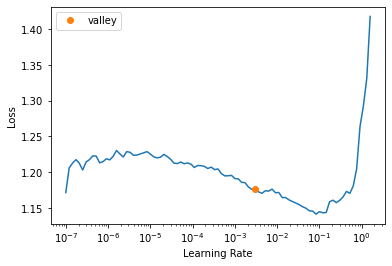

In [39]:
learn.lr_find()

fit_one_cycle => training the model
- `cycles` => how many cycles the model should be trained
- `learning_rate` => how the weights should be affected
- `cbs` => callback when the model should stop

In [40]:
learn.fit_one_cycle(20, 1e-3, cbs=EarlyStoppingCallback(monitor="valid_loss"))

No improvement since epoch 1: early stopping


confusion matrix how the model has performed

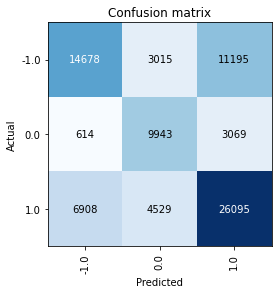

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

export the learner 

In [ ]:
# learn.export("./models/sentimentor_model.pkl")

## Testing the model

load the learner and trying to predict some words

In [6]:
len = load_learner("./models/sentimentor_model.pkl",cpu=True,pickle_module=pickle) 

In [7]:
print(str(len.predict(['love'])[0]))

1.0


In [8]:
print(str(len.predict(['fuck'])[0]))

-1.0


In [9]:
print(str(len.predict(['neutral'])[0]))

-1.0
